In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import re
import pickle as pk
from scipy.signal import hilbert
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
id = []
cant_Tw = []
cant_RT = []
for archivo in os.listdir(path+'Tw_mas_RT_all'):
    df_clus_completo = pd.read_csv(path+'Tw_mas_RT_all/'+archivo)
    patron = re.compile(r'_(\d+).csv')
    coincidencia = patron.search(archivo)
    index = coincidencia.group(1)

    categoria = 'RT'

    df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
    df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

    id.append(index)
    cant_Tw.append(len(df_categoria_false))
    cant_RT.append(len(df_categoria_true))

In [12]:
df = pd.DataFrame({'index': id, 'cant_Tw': cant_Tw, 'cant_RT': cant_RT})
df['bueno'] = False
df

,index,cant_Tw,cant_RT,bueno
0,0,303,318,False
1,105,58,471,False
2,106,32,13,False
3,107,2,0,False
4,108,1156,4053,False
...,...,...,...,...
177,87,6,8,False
178,88,172,684,False
179,89,1763,9731,False
180,90,6672,70256,False


In [14]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
id = []
cant_Tw = []
cant_RT = []
for archivo in os.listdir(path+'Tw_mas_RT_october'):
    df_clus_completo = pd.read_csv(path+'Tw_mas_RT_october/'+archivo)
    patron = re.compile(r'_(\d+).csv')
    coincidencia = patron.search(archivo)
    index = coincidencia.group(1)

    categoria = 'RT'

    df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
    df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

    id.append(index)
    cant_Tw.append(len(df_categoria_false))
    cant_RT.append(len(df_categoria_true))

df_bueno = pd.DataFrame({'index': id, 'cant_Tw': cant_Tw, 'cant_RT': cant_RT})
df_bueno['bueno'] = True
df_bueno

,index,cant_Tw,cant_RT,bueno
0,1024,346,3163,True
1,1037,214,442,True
2,1049,259,11291,True
3,1085,237,666,True
4,1125,320,1609,True
...,...,...,...,...
100,928,59,65,True
101,97,2639,38810,True
102,984,513,4075,True
103,987,467,15511,True


In [24]:
df_tot = pd.concat([df_bueno, df])
df_tot = df_tot.drop_duplicates(subset=['index'])
df_malo = df_tot[df_tot['bueno'] ==False]
df_bb = df_tot[df_tot['bueno'] ==True]

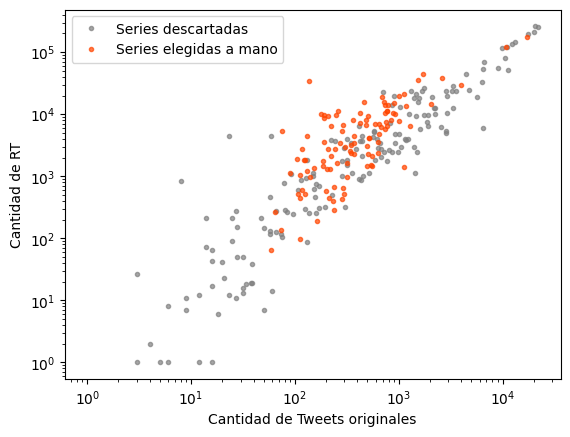

In [32]:
plt.figure()
plt.plot(df_malo['cant_Tw'], df_malo['cant_RT'], marker = 'o', markersize = 3, color = 'gray', alpha = 0.7, linestyle = 'none', label = 'Series descartadas')
plt.plot(df_bb['cant_Tw'], df_bb['cant_RT'], marker = 'o', markersize = 3, color = 'orangered', alpha = 0.7, linestyle = 'none', label  = 'Series elegidas a mano')
plt.xlabel('Cantidad de Tweets originales')
plt.ylabel('Cantidad de RT')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()